<a href="https://colab.research.google.com/github/GGuedesA/Gest-o-da-Informa-o/blob/main/IFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
file_path = "/content/sample_data/CONS_VERD.xlsx"

# Carregar todas as planilhas para verificar o conteúdo
sheets = pd.ExcelFile(file_path)
sheets.sheet_names


['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [45]:
#Visualização das planilhas
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_2016)

https://docs.google.com/spreadsheets/d/1QWkJWU1yt_4o-f2z2eu5vYf0EuI5EgRI2yTetHwLPSI#gid=0


In [21]:
# Lista de anos
anos = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Inicializar DataFrame vazio
dados_completos = pd.DataFrame()

# Loop para carregar e combinar os dados
for ano in anos:
    df = sheets.parse(ano)
    df = df[['Abrangência Municipal', 'Unnamed: 4', 'Unnamed: 2', 'Consumo de verduras e legumes',
             'Unnamed: 6', 'Total de Adultos acompanhados(as)']]
    df.columns = ['Região', 'Município', 'UF', 'Consumo Total', 'Consumo Percentual', 'Adultos Acompanhados']
    df['Ano'] = int(ano)  # Adicionar coluna do ano
    dados_completos = pd.concat([dados_completos, df])

# Remover possíveis valores nulos ou inconsistentes
dados_completos = dados_completos.dropna()

# Converter colunas relevantes para o tipo numérico
dados_completos['Consumo Total'] = pd.to_numeric(dados_completos['Consumo Total'], errors='coerce')
dados_completos['Adultos Acompanhados'] = pd.to_numeric(dados_completos['Adultos Acompanhados'], errors='coerce')

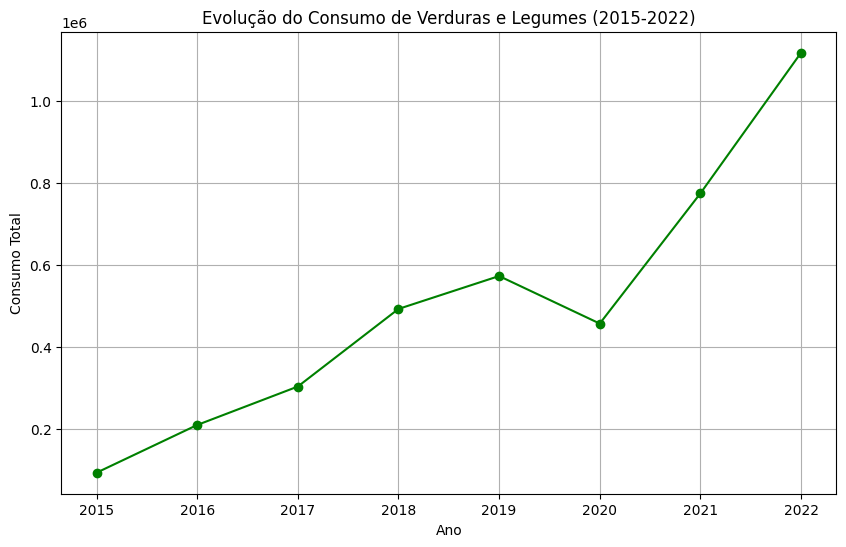

In [17]:
# Gráfico de evolução do consumo total por ano
consumo_por_ano = dados_completos.groupby('Ano')['Consumo Total'].sum()
plt.figure(figsize=(10, 6))
plt.plot(consumo_por_ano.index, consumo_por_ano.values, marker='o', color='green')
plt.title('Evolução do Consumo de Verduras e Legumes (2015-2022)')
plt.xlabel('Ano')
plt.ylabel('Consumo Total')
plt.grid()
plt.show()

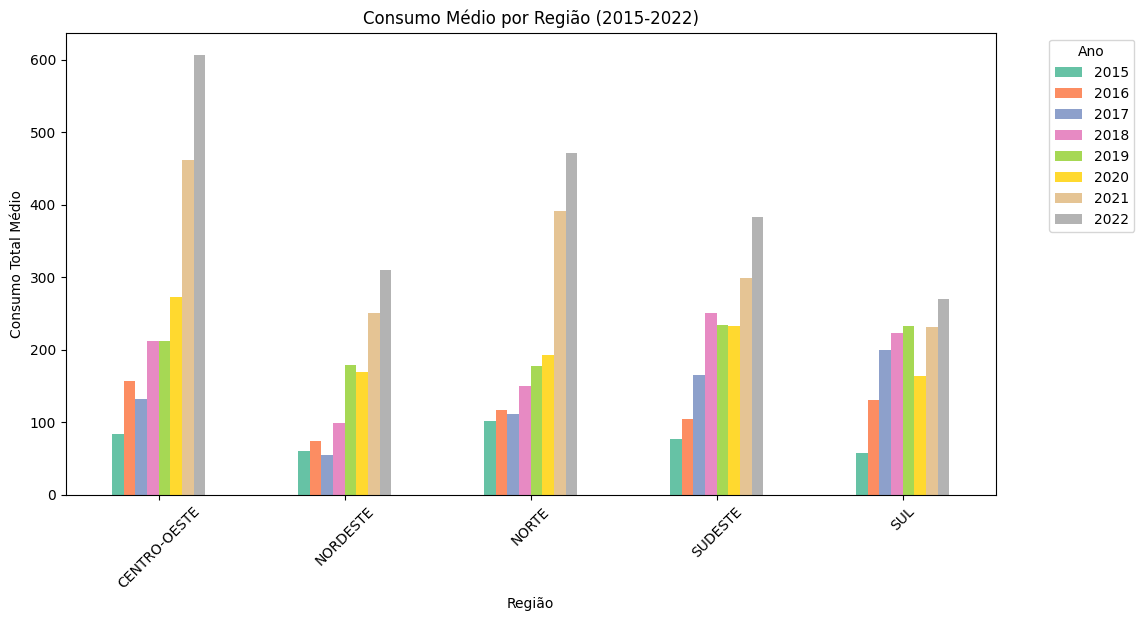

In [28]:
# Gráfico de consumo médio por região
# Calcular o consumo médio por Região e Ano
consumo_regiao_ano = dados_completos.groupby(['Região', 'Ano'])['Consumo Total'].mean().reset_index()

# Pivotar os dados para uma tabela mais legível
tabela_regiao_ano = consumo_regiao_ano.pivot(index='Região', columns='Ano', values='Consumo Total')

# Criar um gráfico para visualizar
tabela_regiao_ano.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Consumo Médio por Região (2015-2022)')
plt.ylabel('Consumo Total Médio')
plt.xlabel('Região')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
